In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.regularizers import L1, L2
import numpy as np
import matplotlib.pyplot as plt
import re

# Load the Fashion-MNIST dataset
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()


# Preprocess the data
train_x = train_x.astype('float32') / 255. - 0.5
test_x = test_x.astype('float32') / 255. - 0.5

# Convert the labels to one-hot encoded vectors
train_y = tf.keras.utils.to_categorical(train_y, num_classes=10)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=10)


# Find the indices of the elements with num_classes = 0 and num_classes = 6
idx_0 = np.where(train_y[:,0]==1)[0]
idx_6 = np.where(train_y[:,6]==1)[0]

# Copy the existing elements with num_classes = 0 and num_classes = 6
new_x_0 = train_x[idx_0]
new_y_0 = train_y[idx_0]
new_x_6 = train_x[idx_6]
new_y_6 = train_y[idx_6]

# Concatenate the original training set with the new copies
train_x = np.concatenate([train_x, new_x_0, new_x_6], axis=0)
train_y = np.concatenate([train_y, new_y_0, new_y_6], axis=0)

# Find the indices of labels 0, 2, 4, and 6 in the train_y array
idx = np.isin(np.argmax(train_y, axis=1), [0, 2, 4, 6])

# Filter the train_x and train_y arrays using the boolean indexing
train_x = train_x[idx]
train_y = train_y[idx]


# # Find the indices of labels 0, 2, 4, and 6 in the train_y array
# idx = np.isin(np.argmax(test_y, axis=1), [0, 2, 4, 6])

# # Filter the train_x and train_y arrays using the boolean indexing
# test_x = test_x[idx]
# test_y = test_y[idx]

# digits_list= [np.argmax(y) for y in train_y]

# digit_counts = {}
# for digit in digits_list:
#     if digit in digit_counts:
#         digit_counts[digit] += 1
#     else:
#         digit_counts[digit] = 1

# print(digit_counts)

9
6
2
7
1
3
9
2
1
7


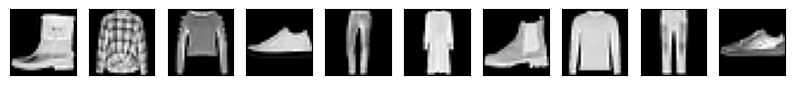

In [2]:
sample_size = 10
np.random.seed()
indices = np.random.choice(len(test_x), size=sample_size, replace=False)
x_sample = test_x[indices]
y_sample = test_y[indices]
fig, axs = plt.subplots(1, sample_size, figsize=(10, 5))
# print(x_sample[0].reshape(28, 28).shape)

for i, (x, y) in enumerate(zip(x_sample, y_sample)):
    print(np.argmax(y))
    img = x.reshape(28, 28)
    axs[i].imshow(img, cmap='gray')
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    # axs[i].set_title(y)

In [ ]:
droput = 0.25
alpha = 0.00001
# alpha = 0
activ = 'relu'
# activ = 'sigmoid'
# activ = 'tanh'
# activ = 'relu'
# Define the neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=activ, kernel_regularizer=L2(alpha)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation=activ, kernel_regularizer=L2(alpha)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation=activ, kernel_regularizer=L2(alpha)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
k = 1
precision = tf.keras.metrics.Precision(top_k=k)
# rmsprop
# model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=[precision])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[precision])



# Train the model
history = model.fit(train_x, train_y, epochs=20, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_precision = model.evaluate(test_x, test_y)

print('Test loss:', test_loss)
print(f'Test precision @ {k}:', test_precision)


Epoch 1/20
225/225 [==============================] - 2s 5ms/step - loss: 0.7196 - precision: 0.7138 - val_loss: 0.7019 - val_precision: 0.6556
Epoch 2/20
225/225 [==============================] - 1s 4ms/step - loss: 0.5272 - precision: 0.7943 - val_loss: 0.6560 - val_precision: 0.6861
Epoch 3/20
225/225 [==============================] - 1s 4ms/step - loss: 0.4809 - precision: 0.8122 - val_loss: 0.6924 - val_precision: 0.6913
Epoch 4/20
225/225 [==============================] - 1s 3ms/step - loss: 0.4558 - precision: 0.8235 - val_loss: 0.5640 - val_precision: 0.7265
Epoch 5/20
225/225 [==============================] - 1s 4ms/step - loss: 0.4387 - precision: 0.8303 - val_loss: 0.5795 - val_precision: 0.7406
Epoch 6/20
225/225 [==============================] - 1s 3ms/step - loss: 0.4204 - precision: 0.8366 - val_loss: 0.5043 - val_precision: 0.7768
Epoch 7/20
225/225 [==============================] - 1s 3ms/step - loss: 0.4096 - precision: 0.8436 - val_loss: 0.7248 - val_precision:

In [8]:
misclassified_indices = []
mismatches = []
y_pred = model.predict(test_x)
for i in range(len(test_y)):
    if np.argmax(test_y[i]) != np.argmax(y_pred[i]):
        misclassified_indices.append(i)
        mismatches.append((np.argmax(test_y[i]),  np.argmax(y_pred[i])))
# print([ (y1.argmax(), y2.argmax()) for y1, y2 in zip(test_y,y_pred)])
# print(dict(mismatches))
# print(mismatches)
pair_frequency = {}
for pair in mismatches:
    if pair in pair_frequency:
        pair_frequency[pair] += 1
    else:
        pair_frequency[pair] = 1

# find the pairs that appear more than others
most_frequent_pairs = []
max_frequency = max(pair_frequency.values())
print(max_frequency)
for pair, frequency in pair_frequency.items():
    if frequency > 40:
        print(f"{pair}: {frequency}")
        most_frequent_pairs.append(pair)


313/313 [==============================] - 0s 965us/step
933
(9, 0): 667
(1, 0): 933
(5, 0): 314
(7, 0): 708
(5, 6): 494
(7, 2): 51
(3, 0): 656
(4, 2): 67
(8, 6): 321
(7, 4): 134
(9, 2): 110
(3, 4): 131
(8, 0): 421
(8, 2): 62
(6, 0): 183
(3, 6): 127
(2, 6): 52
(8, 4): 196
(6, 2): 76
(6, 4): 81
(7, 6): 107
(3, 2): 86
(9, 6): 203
(5, 2): 162
(2, 4): 103
(4, 6): 48
(0, 6): 72


precision_1


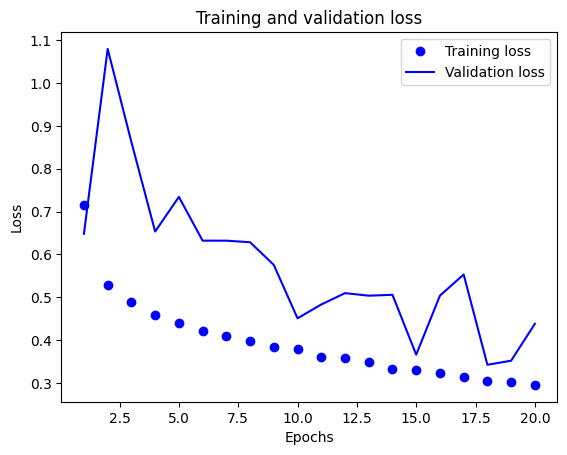

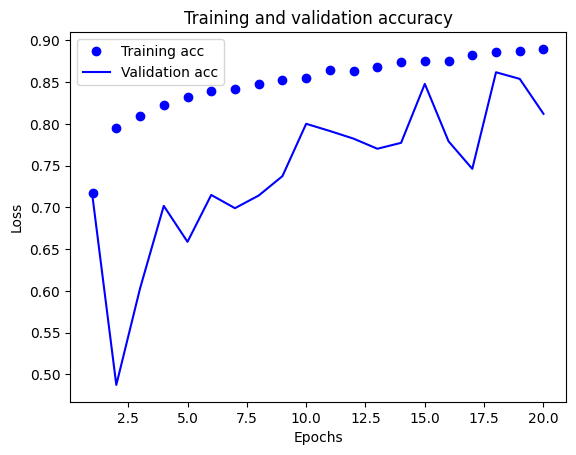

In [9]:
history_dict = history.history

prec_key = 'precision'
val_prec_key = 'val_precision'
for key in history_dict.keys():
    if re.search(r'\d+$', key):
        # Extract the number from the string
        number = int(re.findall(r'\d+', key)[-1])
        prec_key += f'_{number}'
        val_prec_key += f'_{number}'
        break

print(prec_key)    
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict[prec_key]) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict[val_prec_key]
plt.plot(epochs, history_dict[prec_key], 'bo', label='Training acc')
plt.plot(epochs, history_dict[val_prec_key], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()